# Importing data

In [102]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


account_df = pd.read_csv('data/account.csv',sep=';')
card_df = pd.read_csv('data/card_dev.csv', sep=';')
client_df = pd.read_csv('data/client.csv',sep=';')
disp_df = pd.read_csv('data/disp.csv',sep=';')
district_df = pd.read_csv('data/district.csv',sep=';')
loan_df = pd.read_csv('data/loan_dev.csv', sep=';')
trans_df = pd.read_csv("data/trans_dev.csv",sep=";", low_memory=False)

# Account Stats

In [103]:
account_df.rename(columns={'frequency':'account_frequency'}, inplace=True)
account_df.rename(columns={'date':'account_date'}, inplace=True)
account_df['account_date'] = pd.to_datetime(account_df['account_date'], format='%y%m%d')
print(account_df.head())
account_df.to_csv('refined/account.csv')

   account_id  district_id account_frequency account_date
0         576           55  monthly issuance   1993-01-01
1        3818           74  monthly issuance   1993-01-01
2         704           55  monthly issuance   1993-01-01
3        2378           16  monthly issuance   1993-01-01
4        2632           24  monthly issuance   1993-01-02


# Client Processing


In [104]:
client_df.rename(columns={'district_id':'client_district_id'}, inplace=True)
client_df.rename(columns={'birth_number':'client_birth_number'}, inplace=True)

def fix_birthday(x):
    s = str(x)
    if(int(str(x)[2:4])>12):
        partial=str(int(s[2:4])-50)
        if(len(partial)==1): 
            partial="0"+partial  
        res=s[0:2]+partial+s[4:]
    else:
        return x
    return int(res)

def fix_date(x):
    if x.year > 2000:
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year,x.month,x.day)
client_df['client_gender'] = client_df['client_birth_number'].apply(lambda x: 'M' if (int(str(x)[2:4])<=12) else 'F')
client_df['client_birth_number'] = client_df['client_birth_number'].apply(lambda x : fix_birthday(x))




client_df.to_csv('refined/client.csv')

# Disposition Processing

In [105]:
disp_df.rename(columns={'type':'disp_type'}, inplace=True)
disp_df.to_csv('refined/disposition.csv')

# Transaction Processing

In [106]:
trans_df.rename(columns={'date' : 'trans_date'}, inplace=True)
trans_df.rename(columns={'type' : 'trans_type'}, inplace=True)
trans_df.rename(columns={'operation' : 'trans_operation'}, inplace=True)
trans_df.rename(columns={'amount' : 'trans_amount'}, inplace=True)
trans_df.rename(columns={'balance' : 'trans_balance'}, inplace=True)
trans_df.rename(columns={'k_symbol' : 'trans_k_symbol'}, inplace=True)
trans_df.rename(columns={'bank' : 'trans_bank'}, inplace=True)
trans_df.rename(columns={'account': 'trans_account'}, inplace=True)

trans_df['trans_date'] = pd.to_datetime(trans_df['trans_date'], format='%y%m%d')

#as colunas bank e account não são necessárias, trans_k_symbol têm muitos valores nulos
trans_df.drop(['trans_bank', 'trans_account', 'trans_k_symbol'], axis=1, inplace=True)

#withdrawal in cash para withdrawal
trans_df.loc[trans_df["trans_type"]=="withdrawal in cash","trans_type"] = "withdrawal" 
#se for withdrawal, o ammount é negativo
trans_df.loc[trans_df["trans_type"]=="withdrawal","trans_amount"] *= -1
print(trans_df.head())



trans_df.to_csv('refined/transaction.csv')

   trans_id  account_id trans_date trans_type               trans_operation  \
0   1548749        5270 1993-01-13     credit                credit in cash   
1   1548750        5270 1993-01-14     credit  collection from another bank   
2   3393738       11265 1993-01-14     credit                credit in cash   
3   3122924       10364 1993-01-17     credit                credit in cash   
4   1121963        3834 1993-01-19     credit                credit in cash   

   trans_amount  trans_balance  
0         800.0          800.0  
1       44749.0        45549.0  
2        1000.0         1000.0  
3        1100.0         1100.0  
4         700.0          700.0  


# Loan Processing

In [107]:

loan_df.rename(columns={'date':'loan_date'}, inplace=True)
loan_df.rename(columns={'amount':'loan_amount'}, inplace=True)
loan_df.rename(columns={'duration':'loan_duration'}, inplace=True)
loan_df.rename(columns={'payments':'loan_payments'}, inplace=True)
loan_df.rename(columns={'status':'loan_status'}, inplace=True)

loan_df['loan_date'] = pd.to_datetime(loan_df['loan_date'], format='%y%m%d')

loan_df.to_csv('refined/loan.csv')

# Credit Card Processing

In [108]:
card_df.rename(columns={'type' : 'card_type'}, inplace=True)
card_df.rename(columns={'issued' : 'card_issued'}, inplace=True)
card_df.to_csv('refined/card.csv')

# District (demograph) Processing

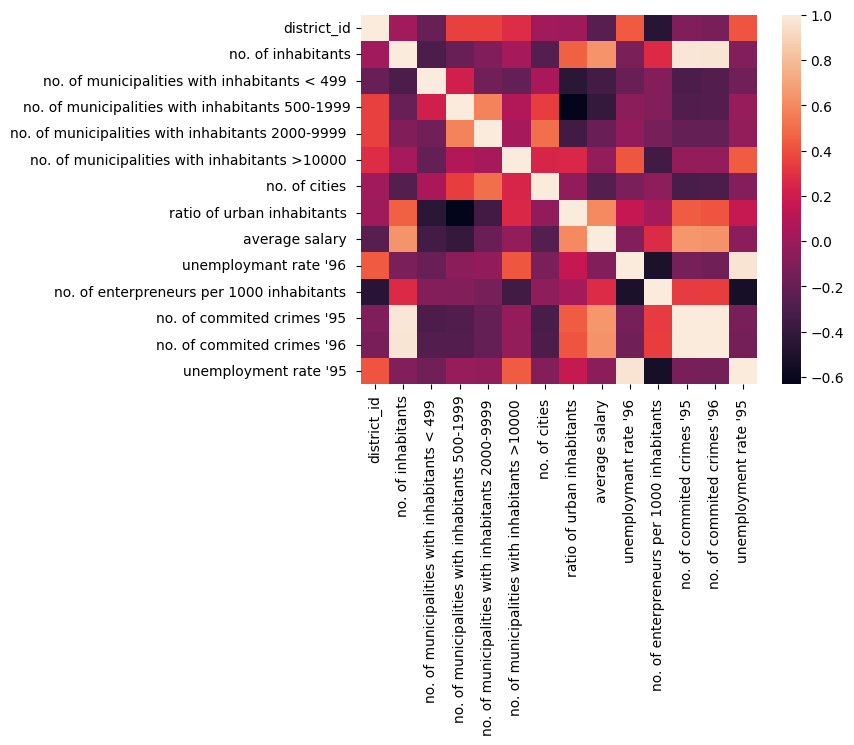

In [109]:
district_df.rename(columns={'code ' : 'district_id'}, inplace=True)
district_df["unemployment rate '95 "] = pd.to_numeric(district_df["unemploymant rate '95 "], errors='coerce')
#filling NA values with mean
district_df["unemployment rate '95 "].fillna(district_df["unemployment rate '95 "].mean(), inplace=True)

district_df["no. of commited crimes '95 "] = pd.to_numeric(district_df["no. of commited crimes '95 "], errors='coerce')
#filling NA values with mean
district_df["no. of commited crimes '95 "].fillna(district_df["no. of commited crimes '95 "].mean(), inplace=True)


corr = district_df.corr()
sns.heatmap(corr);
district_df.to_csv('refined/district.csv')